In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("DATASET/A1/img_tag.csv")
df.head()

,Unnamed: 0,c,r,e,name,path,text
0,0,c3,r1,e3,c3r1e3n12,badata/cd1/data/c3/r1/images/e3/c3r1e3n12.tif,Pequeño defecto de hilo en la mitad inferior d...
1,1,c3,r1,e3,c3r1e3n28,badata/cd1/data/c3/r1/images/e3/c3r1e3n28.tif,Gran defecto de hilo en la imagen.
2,2,c3,r1,e3,c3r1e3n25,badata/cd1/data/c3/r1/images/e3/c3r1e3n25.tif,Gran defecto de hilo en la imagen.
3,3,c3,r1,e3,c3r1e3n11,badata/cd1/data/c3/r1/images/e3/c3r1e3n11.tif,Pequeño defecto de hilo en la mitad superior d...
4,4,c3,r1,e3,c3r1e3n47,badata/cd1/data/c3/r1/images/e3/c3r1e3n47.tif,Gran defecto de hilo en la imagen.


In [4]:
#for path correcting
len("badata/cd1/data/")

16

In [5]:
my_df = pd.read_csv("A1.csv")
my_df.head()

,Unnamed: 0,paths,c,r,e,n
0,0,DATASET/A1/c1/r1/images/e0/c1r1e0n1.tif,1,1,0,1
1,1,DATASET/A1/c1/r1/images/e0/c1r1e0n2.tif,1,1,0,2
2,2,DATASET/A1/c1/r1/images/e0/c1r1e0n3.tif,1,1,0,3
3,3,DATASET/A1/c1/r1/images/e0/c1r1e0n4.tif,1,1,0,4
4,4,DATASET/A1/c1/r1/images/e0/c1r1e0n5.tif,1,1,0,5


In [6]:
#create empty column of text
my_df["text"] = ["??"]*(len(my_df))

In [7]:
#in the original df where we haven't got any value put a "??"
df.loc[df[df["text"].isnull() == True]["text"].index.values,"text"] = "No error"

In [8]:
for idx in df.index:
    my_df_idx = my_df[my_df["paths"] == ("DATASET/A1/"+df.iloc[idx]["path"][16:])].index.values
    if len(my_df_idx) != 0 :
        my_df.at[my_df_idx[0],"text"] = df.iloc[idx]["text"]

Now we have a dataframe with the updated file path with all files in the dataset, files with no description have a ?? and files with no errors "No error"

In [9]:
errors = []
for idx in my_df.index: #iterate rows
    txt = my_df.iloc[idx]["text"] #get text of that row
    if txt == "??" or txt == "Inserte fallas en la imagen.": #not assigned, no data
        #print(txt)
        errors.append(0)
    elif txt == "No error": #no error
        #print(txt)
        errors.append(1)
    elif("gujero" in txt): #forat
        errors.append(2)
    elif("rieta" in txt) or ("esgarro" in txt) or ("aya" in txt) or ("efecto" in txt) or ("efectos" in txt)  or ("Fallo de hilo" in txt) or ("Enhebre fallas" in txt): #marques
        errors.append(3)
    elif("ancha" in txt): #taques
        errors.append(4)
    elif("liegue" in txt): #hole !""
        errors.append(5)
    elif("franja" in txt) or ("Franja" in txt): #hole
        errors.append(6)
    else:
        errors.append(7)
my_df["error"] = errors

In [10]:
#used for debuuging, searching for images classified as 7 that shouldnt
#pd.set_option('display.max_rows', None)
#my_df[my_df["error"]==7]

In [11]:
#pd.set_option('display.max_rows', 10)
#used in debugging to visualize classified as other images
#import cv2
#import matplotlib.pyplot as plt
#plt.imshow(cv2.imread("DATASET/A1/c2/r3/images/e3/c2r3e3n10.tif"))

In [12]:
my_df

,Unnamed: 0,paths,c,r,e,n,text,error
0,0,DATASET/A1/c1/r1/images/e0/c1r1e0n1.tif,1,1,0,1,No error,1
1,1,DATASET/A1/c1/r1/images/e0/c1r1e0n2.tif,1,1,0,2,No error,1
2,2,DATASET/A1/c1/r1/images/e0/c1r1e0n3.tif,1,1,0,3,No error,1
3,3,DATASET/A1/c1/r1/images/e0/c1r1e0n4.tif,1,1,0,4,No error,1
4,4,DATASET/A1/c1/r1/images/e0/c1r1e0n5.tif,1,1,0,5,No error,1
...,...,...,...,...,...,...,...,...
3143,3143,DATASET/A1/c4/r3/images/e7/c4r3e7n46.tif,4,3,7,46,La distancia de la cámara se redujo de 23 cm a...,7
3144,3144,DATASET/A1/c4/r3/images/e7/c4r3e7n47.tif,4,3,7,47,La distancia de la cámara se redujo de 23 cm a...,7
3145,3145,DATASET/A1/c4/r3/images/e7/c4r3e7n48.tif,4,3,7,48,La distancia de la cámara se redujo de 23 cm a...,7
3146,3146,DATASET/A1/c4/r3/images/e7/c4r3e7n49.tif,4,3,7,49,La distancia de la cámara se redujo de 23 cm a...,7


---
## Training the model

---

We cannot directly train on all images as vectors becuase they are too many and too big, we have to preprocess them before.

We'll apply a different image processing for each class of error

In [23]:
#test images
import cv2
import matplotlib.pyplot as plt

No error


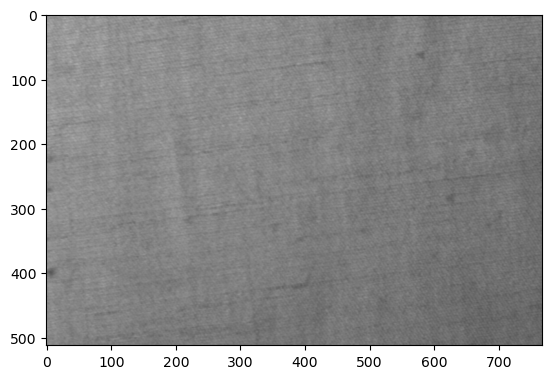

In [61]:
searched = my_df[my_df["error"] == 1].reset_index()
path = my_df[my_df["error"] == 1].iloc[0]["paths"]
print(my_df[my_df["error"] == 1].iloc[0]["text"])
img  = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))
plt.show()
#(thresh, BandW) = cv2.threshold(img, 130,200, cv2.THRESH_BINARY)
#plt.imshow(cv2.cvtColor(BandW,cv2.COLOR_GRAY2RGB))
crop = img[:100,:100]

Pequeño agujero en la esquina inferior derecha.


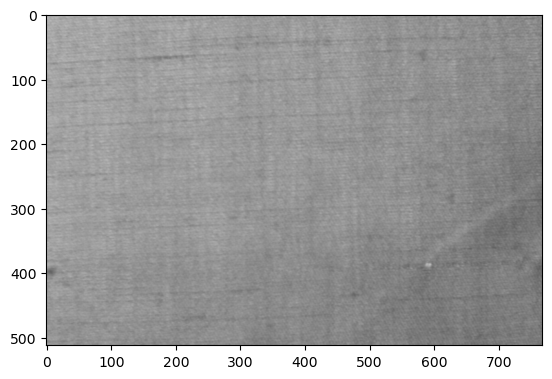

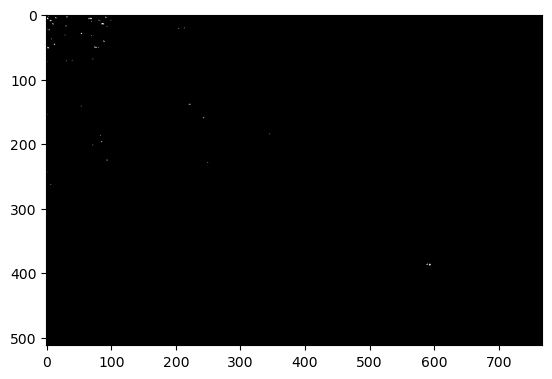

In [79]:
searched = my_df[my_df["error"] == 2].reset_index()
path = searched.iloc[0]["paths"]
print(searched.iloc[0]["text"])
img  = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_GRAY2RGB))
plt.show()
(thresh, BandW) = cv2.threshold(img, 180,255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(BandW,cv2.COLOR_GRAY2RGB))
#crop = img[:100,:100]

In [12]:
#first step convert all images into a vector
images_vectors = []
for idx in my_df.index:
    if(my_df.iloc[idx]["error"] != 0):
        img  = cv2.cvtColor(cv2.imread(my_df.iloc[idx]["paths"]), cv2.COLOR_BGR2GRAY)
        images_vectors.append(list(np.asarray(img).reshape(-1)))